In [1]:
import numpy as np
print(np.__version__)

1.16.5


In [2]:
!pip install numpy==1.16.5
!pip install pandas==0.24.2

In [1]:
filename='virus dataset.fasta'

In [2]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
seq_obj=SeqIO.parse(filename,'fasta')

In [4]:
sequences=[]

In [5]:
for seq in seq_obj:
    sequences.append(seq)

In [6]:
len(sequences)

34550

In [7]:
f_rec=sequences[30]
print(f_rec.id)
print(f_rec.description)
print(len(f_rec.seq))

JX878410.1
JX878410.1 Monkeypox virus isolate DRC 06-1070, complete genome
198886


In [8]:
for record in sequences:
    seq_id=record.id
    seq_name=record.name
    seq_desc=record.description
    sequence=record.seq
    length=len(sequence)

In [9]:
seq_ids=[]
seq_lengths=[]
seqs=[]
seq_descs=[]
label=[]

In [10]:
for record in sequences:
    seq_id=record.id
    sequence=record.seq[200:1500]
    seq_desc=record.description
    if('coronavirus' in seq_desc):
        label.append('COVID-19')
    elif('Dengue' in seq_desc):
        label.append('Dengue')
    elif('Monkeypox' in seq_desc):
        label.append('Monkeypox')
    elif('Hepatitis B' in seq_desc):
        label.append('Hepatitis B')
    elif('Hepatitis C' in seq_desc):
        label.append('Hepatitis C')
    elif('HIV' in seq_desc):
        label.append('HIV')
    elif('Human respiratory syncytial' in seq_desc):
        label.append('Human orthopneumovirus')
    elif('TTV-like' in seq_desc):
        label.append('TTV-like')
    elif('Influenza A' in seq_desc):
        label.append('Influenza A')
    else:
        label.append(None)
    
    length=len(sequence)
    
    seq_ids.append(seq_id)
    seq_descs.append(seq_desc)
    
    seq_lengths.append(length)
    seqs.append(sequence)

In [11]:
c=0
for l in label:
    if(l!='NaN'):
        c+=1
print(c)

34550


In [12]:
len(seq_ids)

34550

In [13]:
dataframe=pd.DataFrame()
dataframe['seq_id']=seq_ids
dataframe['seq_desc']=seq_descs
dataframe['label']=label
dataframe['seq_length']=seq_lengths
dataframe['Dna Seq']=seqs

In [14]:
dataframe=dataframe[dataframe['seq_length'].notnull()]

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34550 entries, 0 to 34549
Data columns (total 5 columns):
seq_id        34550 non-null object
seq_desc      34550 non-null object
label         25537 non-null object
seq_length    34550 non-null int64
Dna Seq       34550 non-null object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [15]:
dataframe['Dna Seq']=dataframe['Dna Seq'].astype(str)

In [16]:
dataframe['Dna Seq']=dataframe['Dna Seq'].apply(lambda x:x.replace('(','').replace(',','').replace(')',''))

In [17]:
dataframe=dataframe[dataframe['label'].notnull()]
dataframe.head(15)

,seq_id,seq_desc,label,seq_length,Dna Seq
10,ON675438.1,ON675438.1 Monkeypox virus isolate MPXV_USA_20...,Monkeypox,1300,CGAAGAGAGAAAGAGATGGTTAGTCAAGATATTTTTCTTAGTACAA...
11,JX878429.1,JX878429.1 Monkeypox virus isolate DRC 07-0662...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
12,JX878428.1,JX878428.1 Monkeypox virus isolate DRC 07-0514...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
13,JX878427.1,JX878427.1 Monkeypox virus isolate DRC 07-0480...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
14,JX878426.1,JX878426.1 Monkeypox virus isolate DRC 07-0450...,Monkeypox,1300,GTTAGTCAAGATATTTTTCTTAGTACAAAAGTCAATGTTTTAAAAT...
15,JX878425.1,JX878425.1 Monkeypox virus isolate DRC 07-0354...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
16,JX878424.1,JX878424.1 Monkeypox virus isolate DRC 07-0338...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
17,JX878423.1,JX878423.1 Monkeypox virus isolate DRC 07-0337...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
18,JX878422.1,JX878422.1 Monkeypox virus isolate DRC 07-0287...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
19,JX878421.1,JX878421.1 Monkeypox virus isolate DRC 07-0286...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...


In [18]:
dataframe.head(50)

,seq_id,seq_desc,label,seq_length,Dna Seq
10,ON675438.1,ON675438.1 Monkeypox virus isolate MPXV_USA_20...,Monkeypox,1300,CGAAGAGAGAAAGAGATGGTTAGTCAAGATATTTTTCTTAGTACAA...
11,JX878429.1,JX878429.1 Monkeypox virus isolate DRC 07-0662...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
12,JX878428.1,JX878428.1 Monkeypox virus isolate DRC 07-0514...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
13,JX878427.1,JX878427.1 Monkeypox virus isolate DRC 07-0480...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
14,JX878426.1,JX878426.1 Monkeypox virus isolate DRC 07-0450...,Monkeypox,1300,GTTAGTCAAGATATTTTTCTTAGTACAAAAGTCAATGTTTTAAAAT...
15,JX878425.1,JX878425.1 Monkeypox virus isolate DRC 07-0354...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
16,JX878424.1,JX878424.1 Monkeypox virus isolate DRC 07-0338...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
17,JX878423.1,JX878423.1 Monkeypox virus isolate DRC 07-0337...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
18,JX878422.1,JX878422.1 Monkeypox virus isolate DRC 07-0287...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
19,JX878421.1,JX878421.1 Monkeypox virus isolate DRC 07-0286...,Monkeypox,1300,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...


In [19]:
dataframe['label'].value_counts()

Hepatitis B               8625
HIV                       5106
Dengue                    4333
TTV-like                  2487
Human orthopneumovirus    1724
Monkeypox                 1031
COVID-19                   875
Hepatitis C                811
Influenza A                545
Name: label, dtype: int64

In [20]:
count=0
for f_seq in seqs:
    if(len(f_seq)>3000):
        count+=1
    
    
print(count)

0


In [21]:
dataframe=dataframe.drop(['seq_id','seq_length','seq_desc'],axis=1)

In [22]:
dataframe.tail(15)

,label,Dna Seq
34434,HIV,TCATCACACAGCCCGCGAGGTGCATCCGGAGTACTACAAGGACTGC...
34435,HIV,TCATCACGTGGCCCGAGAGCAGATTGGTTGCACTTTAAATTTTCCA...
34436,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACATTATATGCTAA...
34437,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATAGGCTAA...
34438,HIV,GAGAGAATTAAGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34439,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34440,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34441,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34442,HIV,GAAAAAATTAGGTTAAGGCCAGGGGGAAAGAAACACTATATGCTAA...
34443,HIV,GAGAAAATTAGGTTAAGGCCAGGGGGAAAGAAACATTATATGCTAA...


In [23]:
def clean_Labels(x):
    
    if x=='Monkeypox':
        return 1
    if x == 'HIV':
        return 2
    if x=='Dengue':
        return 3
    if x == 'Human orthopneumovirus':
        return 4
    if x=='Hepatitis B':
        return 5
    if x == 'COVID-19':
        return 6
    if x=='Hepatitis C':
        return 7
    if x=='TTV-like':
        return 8
    if x=='Influenza A':
        return 9
    
    
    return float(x)

In [24]:
dataframe['label']=dataframe['label'].apply(clean_Labels)

In [25]:
dataframe['label'].to_numpy()

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [26]:
dataframe['label'].unique()

array([1, 2, 5, 3, 6, 4, 7, 8, 9], dtype=int64)

Text(0.5, 1.0, 'label distribution of viruses DNA')

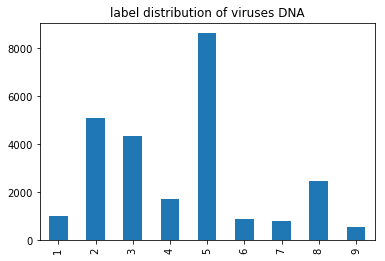

In [27]:
dataframe['label'].value_counts().sort_index().plot.bar()
plt.title("label distribution of viruses DNA")

In [28]:
dataframe.head()

,label,Dna Seq
10,1,CGAAGAGAGAAAGAGATGGTTAGTCAAGATATTTTTCTTAGTACAA...
11,1,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
12,1,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
13,1,AAACTTTTTACGACTCCATCAGAAAGAGGTTTAATATTTTTGTGAG...
14,1,GTTAGTCAAGATATTTTTCTTAGTACAAAAGTCAATGTTTTAAAAT...


In [29]:
def Kmers_funct(seq, size=3):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [30]:
#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

In [31]:
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

In [32]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [33]:
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

C:\Users\Administrator\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

In [34]:
dataframe['words'] = dataframe.apply(lambda x: Kmers_funct(x['Dna Seq']), axis=1)
dataframe = dataframe.drop('Dna Seq', axis=1)

In [35]:
dataframe.head()

,label,words
10,1,"[cga, gaa, aag, aga, gag, aga, gag, aga, gaa, ..."
11,1,"[aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ..."
12,1,"[aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ..."
13,1,"[aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ..."
14,1,"[gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ..."


In [36]:
dataframe['words']

10       [cga, gaa, aag, aga, gag, aga, gag, aga, gaa, ...
11       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
12       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
13       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
14       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
15       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
16       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
17       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
18       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
19       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
20       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
21       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
22       [gtt, tta, tag, agt, gtc, tca, caa, aag, aga, ...
23       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
24       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
25       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, ...
26       [aaa, aac, act, ctt, ttt, ttt, ttt, tta, tac, .

In [37]:
dna_texts = list(dataframe['words'])
for item in range(len(dna_texts)):
    dna_texts[item] =' '.join(dna_texts[item])
#separate labels
y_data = dataframe.iloc[:, 0].values

In [38]:
y_data
print(dna_texts[3])

aaa aac act ctt ttt ttt ttt tta tac acg cga gac act ctc tcc cca cat atc tca cag aga gaa aaa aag aga gag agg ggt gtt ttt tta taa aat ata tat att ttt ttt ttt ttg tgt gtg tga gag aga gac acc ccc cca cat atc tcg cga gaa aag aga gag aga gag aga gaa aaa aag agg gga gat ata taa aaa aaa aaa aac act ctt ttt ttt ttt tta tac acg cga gac act ctc tcc cca cat atc tca cag aga gaa aaa aag aga gag agg ggt gtt ttt tta taa aat ata tat att ttt ttt ttt ttg tgt gtg tga gag aga gac acc ccc cca cat atc tcg cga gac acg cga gag aga gag aga gaa aaa aag agg gga gat ata taa aaa aaa aaa aac act ctt ttt ttt ttt tta tac acg cga gac act ctc tcc cca cat atc tca cag aga gaa aaa aag aga gag agg ggt gtt ttt tta taa aat ata tat att ttt ttt ttt ttg tgt gtg tga gag aga gac acc ccc cca cat atc tcg cga gac acg cga gag aga gag aga gaa aaa aag aga gag aga gat atg tgg ggt gtt tta tag agt gtc tca caa aag aga gat ata tat att ttt ttt ttt ttc tct ctt tta tag agt gta tac aca caa aaa aaa aag agt gtc tca caa aat atg tgt gtt ttt ttt tta 

In [47]:
y_data

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(dna_texts)

In [40]:
print(X.shape)


(25537, 23292)


In [41]:
# Splitting the dna dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [42]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [43]:
y_pred = classifier.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    1     2    3    4     5    6    7    8   9
Actual                                                 
1          207     0    0    0     0    0    0    0   0
2            0  1042    0    0     0    1    0    1  10
3            0     0  891    0     0    0    0    0   1
4            0     0    0  356     0    0    0    0   0
5            0     0    0    0  1603    0    0   64  31
6            0     0    0    0     0  161    0    0   4
7            0     0    0    0     0    0  156    0   0
8            0     0    0    0     0    0    0  487   0
9            0     0    0    0     0    0    0    0  93
accuracy = 0.978 
precision = 0.983 
recall = 0.978 
f1 = 0.979


In [45]:
y_pred

array([5, 4, 5, ..., 5, 8, 2], dtype=int64)

In [46]:
exp="ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA"
